In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv('Data/cust_seg.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [3]:
df.shape

(850, 10)

In [4]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.set_index('Customer Id')
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3
2,47,1,26,100,4.582,8.218,0.0,12.8
3,33,2,10,57,6.111,5.802,1.0,20.9
4,29,2,4,19,0.681,0.516,0.0,6.3
5,47,1,31,253,9.308,8.908,0.0,7.2


In [7]:
df.tail()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Customer Id,,,,,,,,
846,27,1,5,26,0.548,1.220,NaN,6.8
847,28,2,7,34,0.359,2.021,0.0,7.0
848,25,4,0,18,2.802,3.210,1.0,33.4
849,32,1,12,28,0.116,0.696,0.0,2.9
850,52,1,16,64,1.866,3.638,0.0,8.6


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

In [8]:
df = df.fillna(0)
df.isna().sum()

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [9]:
df_scaled = StandardScaler().fit_transform(df)
df_scaled

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

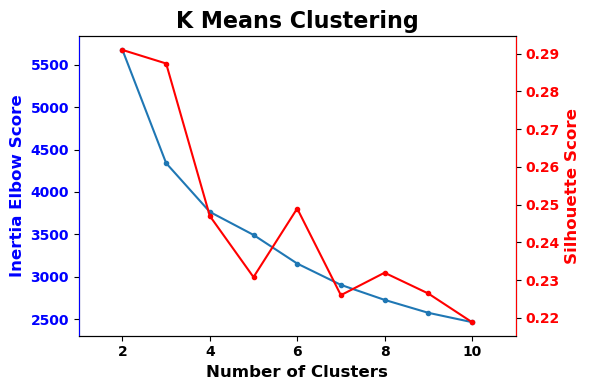

In [24]:
inertias = []
silhouette_scores = []

for k in range (2,11):
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

fig, ax1 = plt.subplots(figsize=(6,4))
plt.title('K Means Clustering' , fontsize = 16 , weight='bold')

ax1.plot(range(2,11), inertias, marker='.')
ax1.set_ylabel('Inertia Elbow Score', color='blue', fontsize=12, weight='bold')
plt.xlabel('Number of Clusters', fontsize=12, weight='bold')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax1.tick_params(axis='y', labelcolor='b')
ax1.xaxis.set_ticks(np.arange(0, 12, 2))

plt.xlim([1,11])

ax2 = ax1.twinx()
ax2.plot(range(2,11), silhouette_scores, color='r', marker='.')
ax2.set_ylabel('Silhouette Score', color='r', fontsize=12, weight='bold')
plt.yticks(fontsize=10, weight='bold')
ax2.tick_params(axis='y', labelcolor='r')
ax2.spines['right'].set_color('r')

ax2.spines['left'].set_color('blue');

plt.tight_layout()
plt.show;

In [26]:
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, n_init='auto', random_state=42)

In [27]:
df['Cluster'] = kmeans.labels_
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,6.3,2
2,47,1,26,100,4.582,8.218,0.0,12.8,0
3,33,2,10,57,6.111,5.802,1.0,20.9,1
4,29,2,4,19,0.681,0.516,0.0,6.3,2
5,47,1,31,253,9.308,8.908,0.0,7.2,0


In [28]:
cluster_groups = df.groupby('Cluster')
cluster_mean_df = cluster_groups.mean()
cluster_mean_df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Cluster,,,,,,,,
0,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.129252,13.915646
1,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.987952,13.994578
2,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991


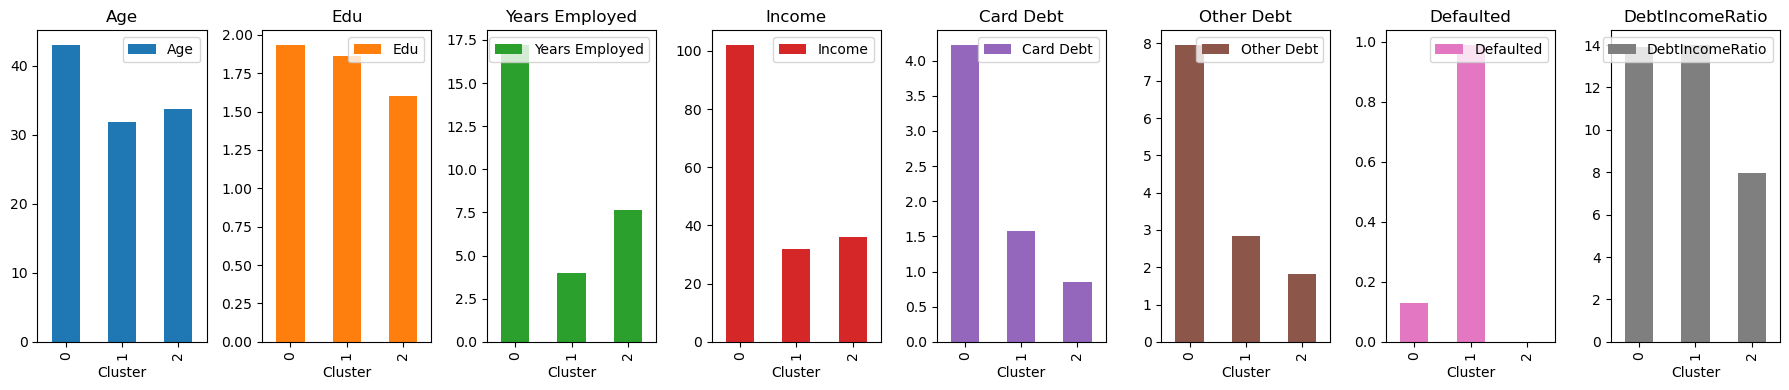

In [40]:
cluster_mean_df.plot(subplots=True, kind='bar', figsize=(18,4), layout=(1,8))
plt.tight_layout();

Cluster 0: Wealthy People
- This cluster consists of hard workers with a lot of experience who are educated and have an average income of 100,000. They spend a lot but are able to pay off their loans

   Recommendation : Offer to upgrade their credit cards via email or text.(Ex:Amex Blue Cash to Amex Gold)

Cluster 1: Irresponsible Spender 
- This cluster has individuals who have little work experience and spends as much as they make, possibly living paycheck to paycheck. They forget to pay off their loans at times.

  Recommendation : I suggest giving them more notifications or warnings to pay off their credit cards via email or text.

Cluster 2: The Moderate 
- This cluster are the people who have an average income of 30,000 and are more careful with their money. They are more responsible so they are able to pay off their loans.

  Recommendation : We can show them the rewards from cash back via email or text to encourage them to use their credit cards more often.